<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/traffic_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_excel('/content/upd_orders_2020.xlsx')
df.head()

,Номер Заказа,дата заказа,year,Статус заказа,email,"ЦЕНА ДО СКИДКИ SUM, RUR","ЦЕНА ПОСЛЕ СКИДКИ SUM, RUR"
0,132312746,2020-01-01,2020,complete,julek.85@mail.ru,2717.50,2320.8333
1,132312754,2020-01-01,2020,complete,galia1407@mail.ru,1683.34,1599.1667
2,132312762,2020-01-01,2020,complete,culpa89@mail.ru,2945.00,2903.3333
3,132312766,2020-01-01,2020,complete,olga-tanskaya@mail.ru,2179.17,1735.0000
4,132312776,2020-01-01,2020,complete,melody79@bk.ru,4179.17,3220.8333


In [51]:
sf = pd.read_excel('/content/traffic_source_2020.xlsx')
sf.head()

,ИД клиента,Email,Шаблон действия,Точка контакта,Дата
0,5916911,lyka17@mail.ru,Переход на сайт,yandex.ru,2020-01-01 00:12:42
1,6587058,cunninghamclan4@msn.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52
2,6587062,shop.yo@gmail.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52
3,6587065,cfuglestad@yahoo.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52
4,6587067,ysinger@windstream.net,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52


In [52]:
sf = sf.rename(columns={"Email": "email", "Точка контакта": "source",  "Шаблон действия": "action",  "Дата": "date",  "B": "c"})
sf.head()

,ИД клиента,email,action,source,date
0,5916911,lyka17@mail.ru,Переход на сайт,yandex.ru,2020-01-01 00:12:42
1,6587058,cunninghamclan4@msn.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52
2,6587062,shop.yo@gmail.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52
3,6587065,cfuglestad@yahoo.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52
4,6587067,ysinger@windstream.net,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52


In [40]:
mn = sf.source.value_counts()

In [45]:
k = mn.head(20)

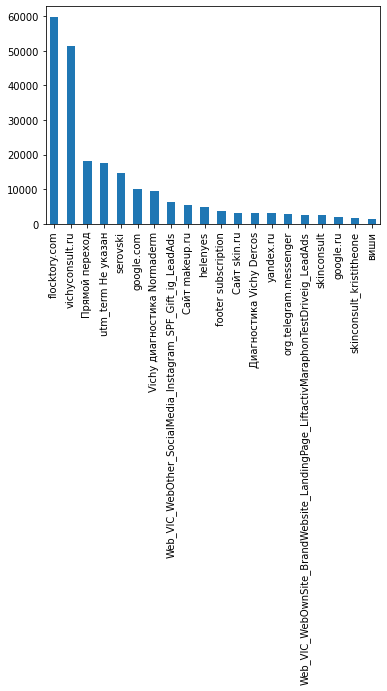

In [48]:
k.plot(kind = 'bar')

In [53]:
sf = pd.merge(sf, df,
                       how='left', on='email')
sf.head(5)

,ИД клиента,email,action,source,date,Номер Заказа,дата заказа,year,Статус заказа,"ЦЕНА ДО СКИДКИ SUM, RUR","ЦЕНА ПОСЛЕ СКИДКИ SUM, RUR"
0,5916911,lyka17@mail.ru,Переход на сайт,yandex.ru,2020-01-01 00:12:42,NaN,NaT,NaN,NaN,NaN,NaN
1,6587058,cunninghamclan4@msn.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52,NaN,NaT,NaN,NaN,NaN,NaN
2,6587062,shop.yo@gmail.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52,NaN,NaT,NaN,NaN,NaN,NaN
3,6587065,cfuglestad@yahoo.com,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52,NaN,NaT,NaN,NaN,NaN,NaN
4,6587067,ysinger@windstream.net,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 00:42:52,NaN,NaT,NaN,NaN,NaN,NaN


In [54]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267603 entries, 0 to 267602
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ИД клиента                   267603 non-null  int64         
 1   email                        266336 non-null  object        
 2   action                       267603 non-null  object        
 3   source                       267603 non-null  object        
 4   date                         267603 non-null  datetime64[ns]
 5   Номер Заказа                 18572 non-null   object        
 6   дата заказа                  18572 non-null   datetime64[ns]
 7   year                         18572 non-null   float64       
 8   Статус заказа                18572 non-null   object        
 9   ЦЕНА ДО СКИДКИ SUM, RUR      18572 non-null   float64       
 10  ЦЕНА ПОСЛЕ СКИДКИ  SUM, RUR  18572 non-null   float64       
dtypes: datetime64[ns](2), floa

In [55]:
sf = sf.dropna()

In [57]:
traffic = sf.source.value_counts()

In [74]:
sf.action.value_counts(normalize = True)

Переход на сайт                                                                           0.732339
Vichy Регистрация в программе лояльности                                                  0.115604
Vichy Оформление заказа с помощью стандартной формы на сайте                              0.050345
Регистрация клиента в операции 'Vichy. Оформление заказа'                                 0.026545
SkinConsultAI. Отправка результата диагностики                                            0.014376
Регистрация клиента в операции 'Подписка Vichy V3'                                        0.008884
Корректировка данных при импорте                                                          0.007754
Изменился потребитель, пользующийся устройством                                           0.006246
Подписка клиента в операции 'Сбор контактов Vichy из соцсетей через LeadAds'              0.004308
Vichy Потребитель прошел диагностику Normaderm                                            0.004200
Vichy Потр

In [70]:
sf

,ИД клиента,email,action,source,date,Номер Заказа,дата заказа,year,Статус заказа,"ЦЕНА ДО СКИДКИ SUM, RUR","ЦЕНА ПОСЛЕ СКИДКИ SUM, RUR"
6,6596389,aa15303128@gmail.com,SkinConsultAI. Отправка результата диагностики,vichyconsult.ru,2020-01-01 01:22:06,132435396,2020-03-21,2020.0,complete,1290.8300,1161.6633
29,6587159,t.schuvalova1981@yandex.ru,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 10:50:01,132314899,2020-01-04,2020.0,complete,4785.8300,4410.0000
42,6587243,tera.glushkova@yandex.ru,Переход на сайт,utm_term Не указан,2020-01-01 12:36:21,132312877,2020-01-01,2020.0,complete,3315.0000,3054.1667
45,6587210,ks_ma92@bk.ru,Vichy Регистрация в программе лояльности,vichyconsult.ru,2020-01-01 12:40:49,132330488,2020-01-20,2020.0,complete,3492.5000,2370.8333
58,6587252,plynin53@mail.ru,Добавление продукта в список в операции 'Vichy...,vichyconsult.ru,2020-01-01 13:09:29,132312913,2020-01-01,2020.0,complete,3438.3300,3168.3333
...,...,...,...,...,...,...,...,...,...,...,...
267525,7357536,alinka.sergeeva.01@inbox.ru,Vichy Оповещение о сгорании баллов через 7 дней,vichyconsult.ru,2020-08-11 18:26:20,132363481,2020-02-03,2020.0,complete,2086.6700,805.0033
267526,7357536,alinka.sergeeva.01@inbox.ru,Vichy Оповещение о сгорании баллов через 7 дней,vichyconsult.ru,2020-08-11 18:26:20,132434243,2020-03-20,2020.0,complete,832.5000,371.6667
267527,7357538,o_shipitun@mail.ru,Vichy Оповещение о сгорании баллов через 7 дней,vichyconsult.ru,2020-08-11 18:26:34,132503083,2020-04-29,2020.0,complete,999.0000,968.3333
267528,7357538,o_shipitun@mail.ru,Vichy Оповещение о сгорании баллов через 7 дней,vichyconsult.ru,2020-08-11 18:26:34,132556694,2020-06-05,2020.0,complete,499.0000,238.3333


In [71]:
traffic.to_excel('traffic_results_2020.xlsx')

In [72]:
sf.to_excel('sf_results_2020.xlsx')

In [66]:
perc = sf.source.value_counts(normalize=True)
perc.head(10)

vichyconsult.ru       0.232716
utm_term Не указан    0.161964
Прямой переход        0.161533
google.com            0.113504
yandex.ru             0.044852
google.ru             0.032199
виши                  0.030638
vichy                 0.011577
instagram.com         0.009261
flocktory.com         0.007700
Name: source, dtype: float64

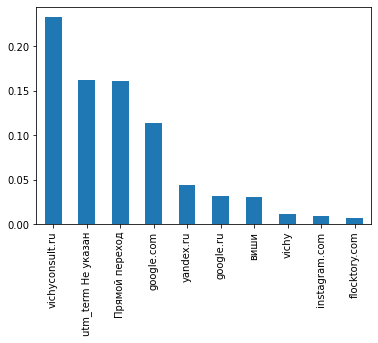

In [69]:
perc.head(10).plot(kind = 'bar')

In [59]:
traffic.head(25)

vichyconsult.ru                                                                            4322
utm_term Не указан                                                                         3008
Прямой переход                                                                             3000
google.com                                                                                 2108
yandex.ru                                                                                   833
google.ru                                                                                   598
виши                                                                                        569
vichy                                                                                       215
instagram.com                                                                               172
flocktory.com                                                                               143
footer subscription                     

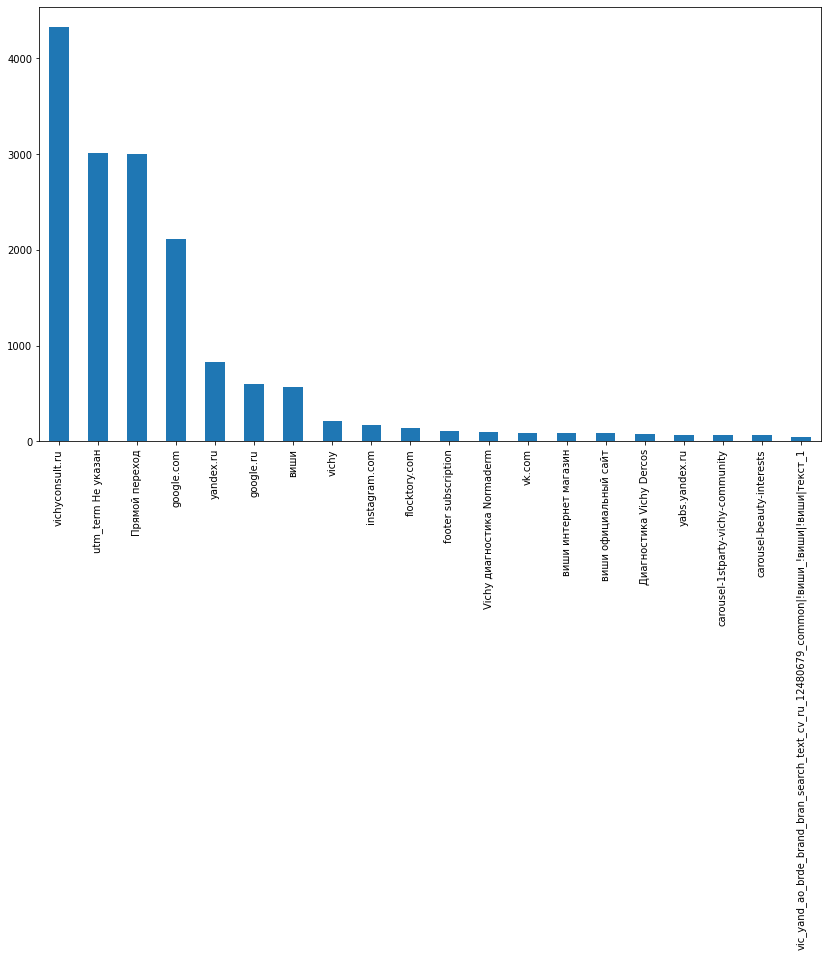

In [64]:
k = traffic.head(20)
k.plot(kind = 'bar', figsize = (14, 8))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 466 to 70396
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Номер Заказа                 171 non-null    object        
 1   дата заказа                  171 non-null    datetime64[ns]
 2   Статус заказа                171 non-null    object        
 3   email                        171 non-null    object        
 4   ЦЕНА ДО СКИДКИ SUM, RUR      171 non-null    float64       
 5   ЦЕНА ПОСЛЕ СКИДКИ  SUM, RUR  171 non-null    float64       
 6   ИД клиента_x                 171 non-null    float64       
 7   action_x                     171 non-null    object        
 8   source_x                     171 non-null    object        
 9   date_x                       171 non-null    datetime64[ns]
 10  ИД клиента_y                 171 non-null    float64       
 11  action_y                     171 non-null

In [15]:
df.source.value_counts()

vichyconsult.ru                                                  109
flocktory.com                                                     25
utm_term Не указан                                                10
Прямой переход                                                     8
vichy                                                              7
google.com                                                         3
header-subscription                                                2
Web_VIC_WebOwnSite_BrandWebsite_Popup_AqualiaThermal_Standard      2
skinconsult                                                        1
виши                                                               1
image-1stparty-skinru-scan                                         1
Добавление сотрудника Vichy                                        1
Диагностика Vichy Dercos                                           1
Name: source, dtype: int64